## Transformación Gaussiana

Algunos modelos de machine learning como la regresión lineal y logística asumen que las variables están normalmente distribuidas. Es bastante común que las variables no sigan esta distribución, sin embargo, se pueden transformar para lograr una distribución Gaussiana. De esta forma, se mejora (en la mayoría de los casos) el desempeño de los modelos.

Si la variable no está normalmente distribuida, en muchas ocasiones es posible encontrar una transformación matemática que normalice su distribución.

### Cómo podemos transformar variables de manera que sigan una distribución normal?

Los métodos más comunes para transformar variables son:

- Transformación Logarítmica- np.log(X)
- Transformación Recíproca  - 1 / X
- Transformación Raíz Cuadrada- X**(1/2)
- Transformación Exponencial (cualquier exponente puede ser usado)
- Transformación Box-Cox
- Transformación Yeo-Johnson

Puedes encontrar las fórmulas para las transformaciones Box-Cox u Yeo-Johnson [aquí](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution)

En resumen, la transformación Box-Cox es una adaptación de la transformación exponencial, donde se escanean varios exponentes, pasando por toda una familia de transformaciones (por favor revisa la fórmula y el video que acompaña este notebook). Al hacer esto, la transformación Box-Cox, de cierta forma, está evaluando una variedad de transformaciones y escogiendo la mejor. Vale la pena resaltar que Box-Cox solo puede ser aplicada a variables positivas.

Yeo-Johnson es una modificación de  la transformación Box-Cox y puede ser aplicada a variables no-positivas


Para leer más acerca de la transformación **Box-Cox** sigue estos enlaces:
- http://www.statisticshowto.com/box-cox-transformation/
- http://www.itl.nist.gov/div898/handbook/eda/section3/eda336.htm
- http://onlinestatbook.com/2/transformations/box-cox.html

Para leer más acerca de la transformación Yeo-Johnson  sigue este [enlace](https://www.stat.umn.edu/arc/yjpower.pdf):

## En este demo

Verás cómo implementar una transformación de variables usando NumPy y los datos House Prices .


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

In [ ]:
# cargar los datos
data = pd.read_csv('https://raw.githubusercontent.com/RubixML/Housing/master/dataset.csv')
#data = pd.read_csv('../houseprice.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


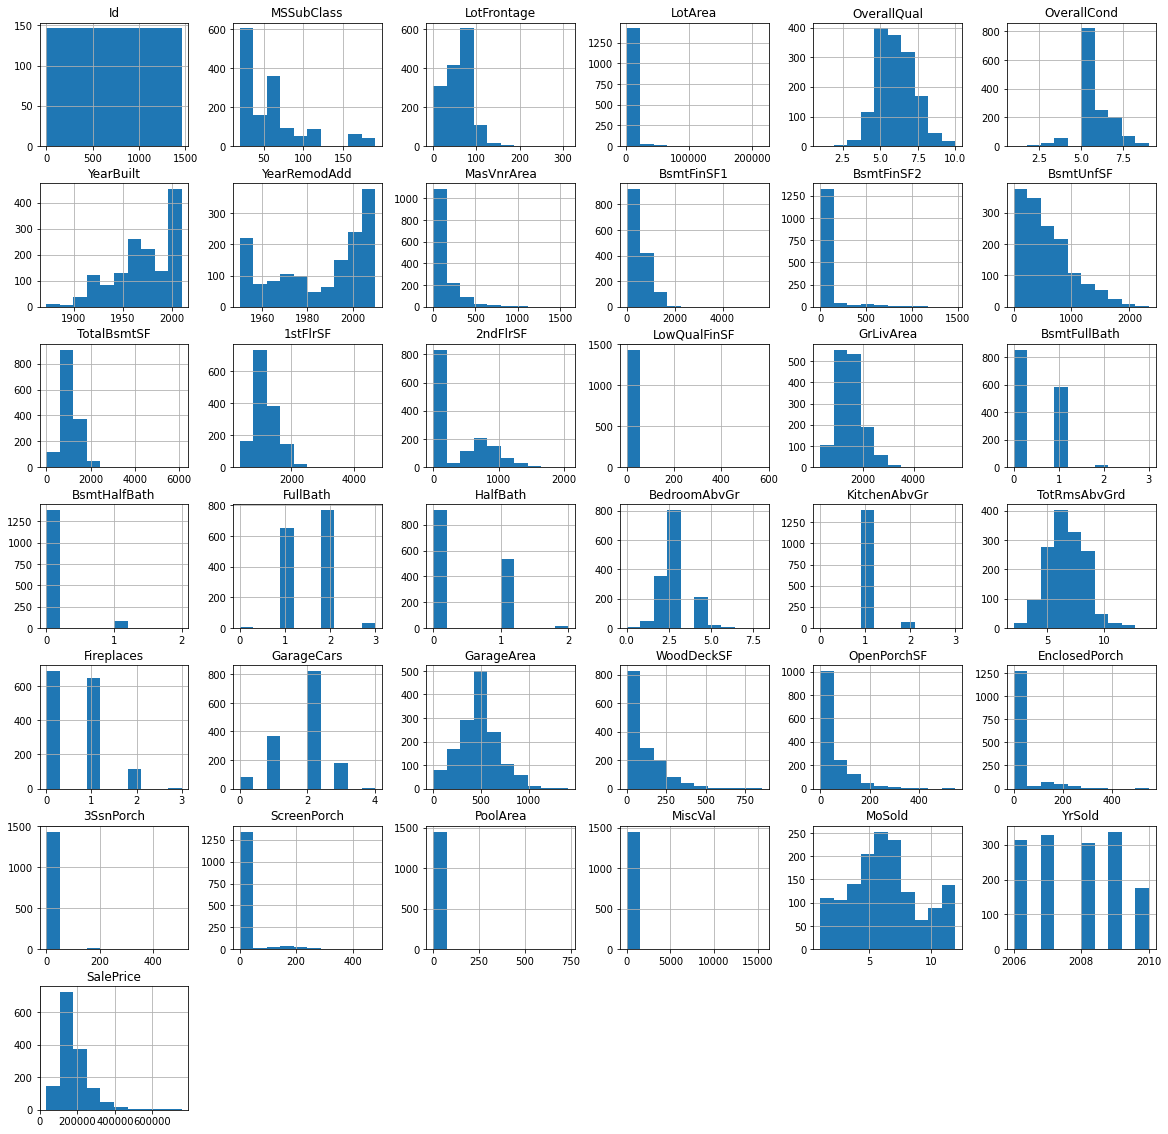

In [ ]:
# exploremos las distribuciones de las variables numéricas
data.hist(figsize=(20,20))
plt.show()

## Gráfica para evaluar normalidad

Para visualizar la distribución de la variables, graficamos un histograma o una gráfica Q-Q. En las gráficas Q-Q, si la variable está normalmente distribuida, los valores de la variable deben caer en una línea a 45 grados cuando se grafican en contra de los cuantiles teóricos.  Esto lo discutimos previamente en la Sección 3 del curso.

In [ ]:
# graficar los histogramas para evaluar rápidamente
# la distribución de las variables

# histograma y gráficos Q-Q

def diagnostic_plots(df, variable):

    # función para graficar un histograma y gráfica Q-Q
    # por cada variable

    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Distribución original

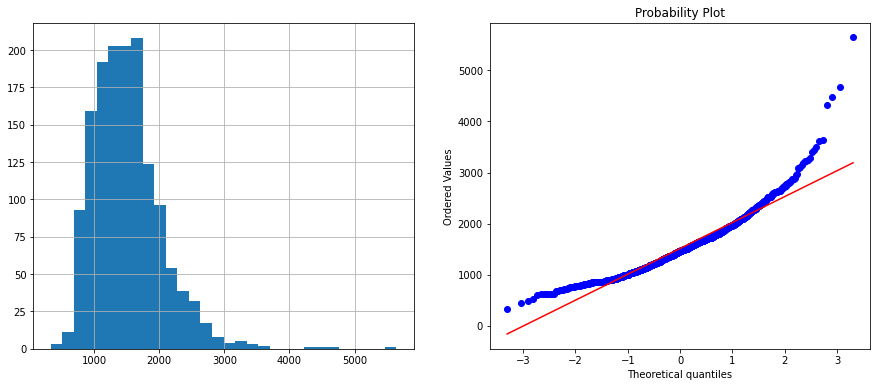

In [ ]:
diagnostic_plots(data, 'GrLivArea')

Podemos ver en las gráficas que las variables no están normalmente distribuidas. Los valores se alejan de la línea roja hacia los extremos de la distribución y podemos ver en el histograma que esta sesgada hacia la derecha.

### Transformación Logarítmica

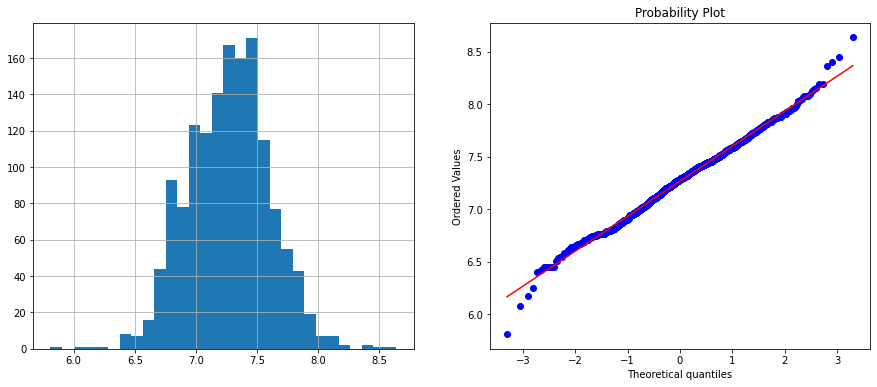

In [ ]:
### transformación logarítmica

data['GrLivArea_log'] = np.log(data['GrLivArea'])

diagnostic_plots(data, 'GrLivArea_log')

La transformación logarítmica retorna una distribución más Gaussiana para esta variable.

### Transformación Recíproca

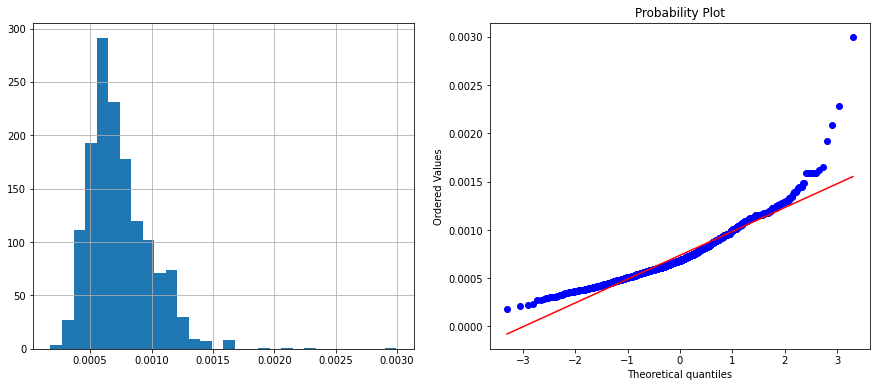

In [ ]:
### transformación recíproca

data['GrLivArea_reciprocal'] = 1 / (data['GrLivArea'])

# np.reciprocal(data['GrLivArea'])

diagnostic_plots(data, 'GrLivArea_reciprocal')

La transformación recíproca no fue muy buena en cuanto a la mejora de la distribución de la variable transformada.

### Transformación raíz cuadrada

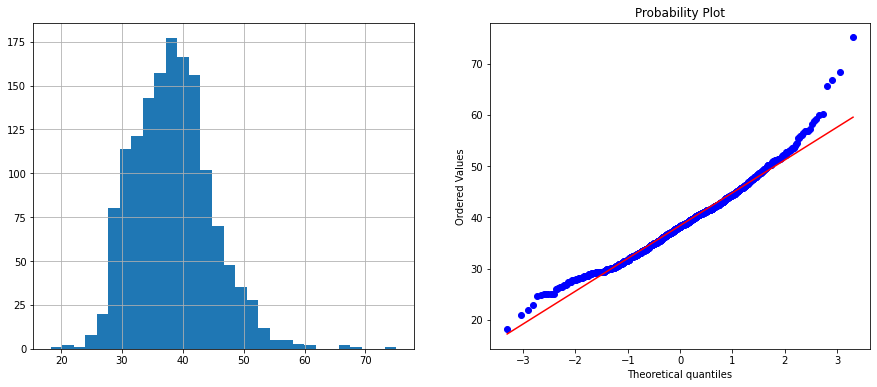

In [ ]:
data['GrLivArea_sqr'] = data['GrLivArea']**(1/2)

# np.power(data['GrLivArea'], 1/2), np.sqrt(data['GrLivArea'])

diagnostic_plots(data, 'GrLivArea_sqr')

La raíz cuadrada ofrece una buena  alternativa para normalizar esta variable

### Exponencial

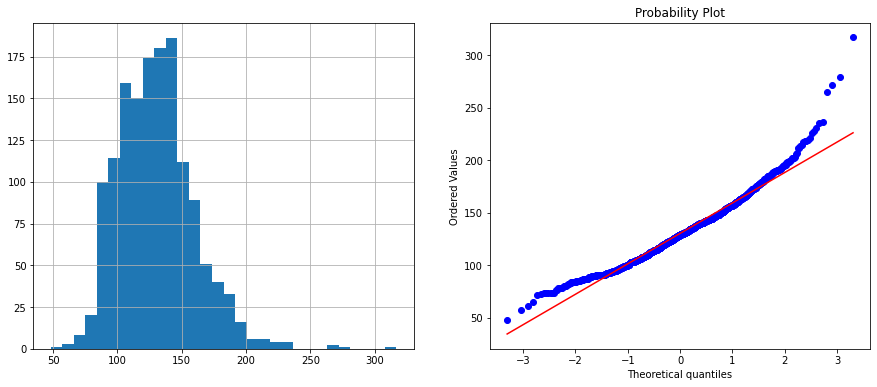

In [ ]:
data['GrLivArea_exp'] = data['GrLivArea']**(1/1.5) # puedes variar el exponente

# np.power(data['GrLivArea'], cualquier exponente)

diagnostic_plots(data, 'GrLivArea_exp')

La transformación exponencial no funcionó muy bien para esta variable.

### Transformación Box-Cox

La transformación Box-Cox se define como:

- Si λ!=0,  T(Y) = (Y exp(λ)−1)/λ
- de otro modo  T(Y) = log(Y)

donde Y es la respuesta de la variable y λ es el parámetro de transformación. λ varia de  -5 a 5. En la transformación, todos los valores de  λ son considerados y el valor óptimo para cada variable es seleccionado.

En resumen, por cada  λ (la transformación evalúa varios valores de λs), el coeficiente de correlación de la gráfica de probabilidad (gráfico Q-Q abajo), es decir la correlación entre los valores ordenados y los cuantiles teóricos) es calculada (la ecuación de optimización varía con cada implementación).

El valor de λ que corresponde al valor máximo de correlación en la gráfica, es el valor óptimo seleccionado para λ.

En Python, podemos evaluar y obtener el mejor valor de λ con la función stats.boxcox del paquete SciPy.

Veamos:

Valor Óptimo λ:  0.006304841218621503


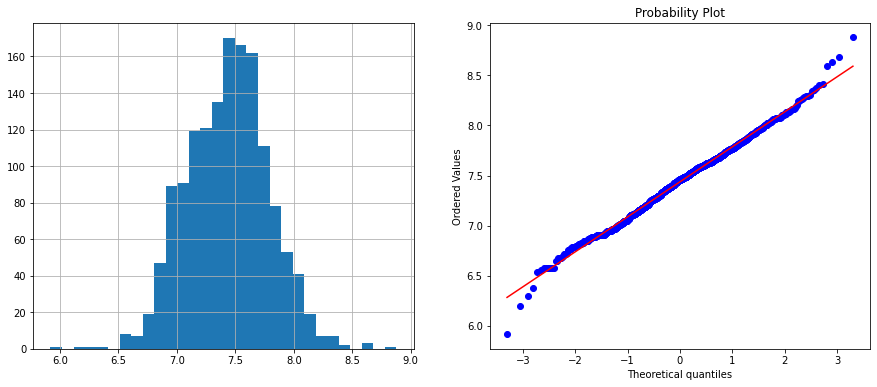

In [ ]:
data['GrLivArea_boxcox'], param = stats.boxcox(data['GrLivArea'])

print('Valor Óptimo λ: ', param)

diagnostic_plots(data, 'GrLivArea_boxcox')

### Yeo-Johnson

Yeo-Johnson es similar a la transformación Box-Cox para los valores positivos de una variable, pero tiene una ecuación diferente para los valores negativos de la variables como se describen [aquí](https://www.stat.umn.edu/arc/yjpower.pdf)

La función busca en un rango de valores para λ y selecciona el valor que devuelve el mejor ajuste a una distribución normal.

In [ ]:
# Para prevenir un error con NumPy

data['GrLivArea'] = data['GrLivArea'].astype('float')

Óptimo valor de λ:  0.005539641278705955


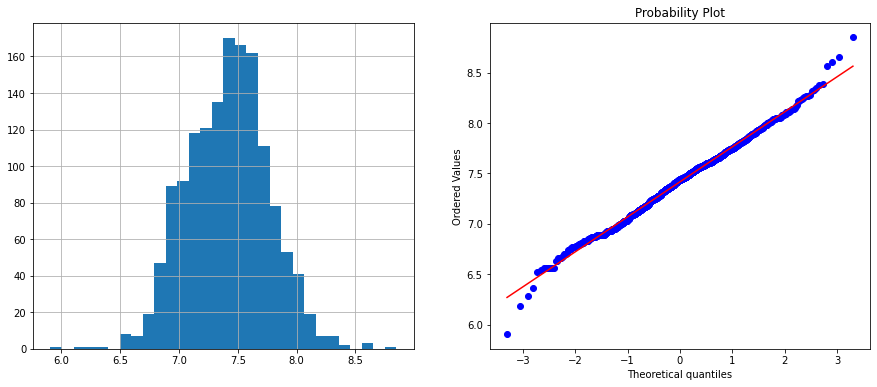

In [ ]:
data['GrLivArea_yeojohnson'], param = stats.yeojohnson(data['GrLivArea'])

print('Óptimo valor de λ: ', param)

diagnostic_plots(data, 'GrLivArea_yeojohnson')

Podemos ver que luego de la transformación, los cuantiles estan de cierta forma más alineados sobre la línea de 45 grados, que corresponde a los cuantiles teóricos de la distribución Gaussiana.